# Análisis textual y web scraping con spaCy y NLTK

Este tutorial es una selección y adaptación al español del libro [Natural Language Processing with Python – Analyzing Text with the Natural Language Toolkit](https://www.nltk.org/book/).

La fuente de textos más importante es sin duda la Web. Es conveniente tener colecciones de texto existentes para explorar. Sin embargo, probablemente tengas en mente tus propias fuentes de texto y necesites aprender a acceder a ellas.

¿Cómo podemos escribir programas para acceder a texto desde archivos locales y desde la web, con el fin de disponer de una variedad ilimitada de material lingüístico?

In [ ]:
!python -m spacy download es_core_news_sm
!pip install beautifulsoup4==4.11.1

In [1]:
import nltk
import spacy

nltk.download("stopwords")
nltk.download("punkt")
nlp = spacy.load("es_core_news_sm")

[nltk_data] Downloading package stopwords to /home/renato/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/renato/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Acceso a texto desde la web y desde el disco

### Lidiando con HTML

Gran parte del texto de la web está en forma de documentos HTML. Puede usar un navegador web para guardar una página como texto en un archivo local y luego acceder a esto como se describe en la sección de archivos. 

Sin embargo, si va a hacer esto con frecuencia, es más fácil conseguir que Python haga el trabajo directamente. El primer paso es el mismo que antes, usando urlopen. 

Para ilustrar, seleccionaremos un artículo de El País llamado “La neurociencia no tiene la receta para los problemas de la educación”:

In [2]:
from urllib.request import urlopen

url = (
    "https://elpais.com/economia/2018/02/16/actualidad/1518783405_526230.html"
)
html = urlopen(url).read()
html[:60]

b'<!DOCTYPE html><html lang="es"><head><link rel="preconnect" '

Puede escribir `print(html)` para ver el contenido HTML en todo su esplendor, incluidas las metaetiquetas, un mapa de imágenes, JavaScript, formularios y tablas.

In [3]:
print(html)

b'<!DOCTYPE html><html lang="es"><head><link rel="preconnect" href="//static.elpais.com"/><link rel="preconnect" href="//ep00.epimg.net"/><link rel="preconnect" href="//imagenes.elpais.com"/><link rel="preload" as="script" href="//ep00.epimg.net/js/prisa/user.min.js?i=1"/><link rel="preconnect" href="//www.googletagservices.com"/><link rel="preconnect" href="//ping.chartbeat.net"/><link rel="preconnect" href="//cdn.krxd.net"/><link rel="preconnect" href="//assets.adobedtm.com"/><link rel="preload" href="https://imagenes.elpais.com/resizer/DfbEfyyI_JGnZhugTx02sFFd4Wc=/414x0/cloudfront-eu-central-1.images.arcpublishing.com/prisa/XMWUEIBKMZHFPFI6WUIKHESKD4.jpg" imagesrcset="https://imagenes.elpais.com/resizer/DfbEfyyI_JGnZhugTx02sFFd4Wc=/414x0/cloudfront-eu-central-1.images.arcpublishing.com/prisa/XMWUEIBKMZHFPFI6WUIKHESKD4.jpg 414w,https://imagenes.elpais.com/resizer/jJ5fJq0jjFARTyglGV9f4milcx0=/828x0/cloudfront-eu-central-1.images.arcpublishing.com/prisa/XMWUEIBKMZHFPFI6WUIKHESKD4.jpg 6

Obtener texto de HTML es una tarea común y la librería BeautifulSoup ofrece una solución a través de la función `get_text()`, que toma una cadena HTML y devuelve texto sin formato:

In [4]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html, "html.parser")
raw = soup.get_text()
raw

'Anna Carballo: “La neurociencia no tiene la receta para los problemas de la educación” | Formación | Economía | EL PAÍS\n\nSeleccione:- - -EspañaAméricaMéxicoColombiaChileArgentinaUSAFormaciónsuscríbeteHHOLAIniciar sesiónOfrecido porEmagisterFormaciónFORMACIÓN“La neurociencia no tiene la receta para los problemas de la educación”La neurocientífica Anna Carballo cree que son los pedagogos los que deben resolver los retos del sistema educativo y reducir la tasa de abandono escolarAna Torres Menárguez19 feb 2018 - 07:22 UTCWhatsappFacebookTwitterCopiar enlaceComentariosAnna Carballo (Barcelona, 1982), doctora en Neurociencias por la Universidad Autónoma de Barcelona, no habla de neuroeducación porque cree que es una disciplina que todavía no existe. Lo defiende bien: los estudios neurocientíficos sobre el aprendizaje se realizan en laboratorios, que nada tienen que ver con un aula en la que 30 alumnos aprenden conjuntamente de forma espontánea y natural. Cree que los problemas de la educ

Para nuestro procesamiento de lenguaje, queremos dividir la cadena en palabras y puntuación. Este paso se llama **tokenización** y produce nuestra estructura familiar, una lista de palabras y puntuación:

In [5]:
tokens = nltk.word_tokenize(raw, language="spanish")
print(tokens)

['Anna', 'Carballo', ':', '“', 'La', 'neurociencia', 'no', 'tiene', 'la', 'receta', 'para', 'los', 'problemas', 'de', 'la', 'educación', '”', '|', 'Formación', '|', 'Economía', '|', 'EL', 'PAÍS', 'Seleccione', ':', '-', '-', '-EspañaAméricaMéxicoColombiaChileArgentinaUSAFormaciónsuscríbeteHHOLAIniciar', 'sesiónOfrecido', 'porEmagisterFormaciónFORMACIÓN', '“', 'La', 'neurociencia', 'no', 'tiene', 'la', 'receta', 'para', 'los', 'problemas', 'de', 'la', 'educación', '”', 'La', 'neurocientífica', 'Anna', 'Carballo', 'cree', 'que', 'son', 'los', 'pedagogos', 'los', 'que', 'deben', 'resolver', 'los', 'retos', 'del', 'sistema', 'educativo', 'y', 'reducir', 'la', 'tasa', 'de', 'abandono', 'escolarAna', 'Torres', 'Menárguez19', 'feb', '2018', '-', '07:22', 'UTCWhatsappFacebookTwitterCopiar', 'enlaceComentariosAnna', 'Carballo', '(', 'Barcelona', ',', '1982', ')', ',', 'doctora', 'en', 'Neurociencias', 'por', 'la', 'Universidad', 'Autónoma', 'de', 'Barcelona', ',', 'no', 'habla', 'de', 'neuroedu

In [6]:
tokens = tokens[15:2097]
tokens

['educación',
 '”',
 '|',
 'Formación',
 '|',
 'Economía',
 '|',
 'EL',
 'PAÍS',
 'Seleccione',
 ':',
 '-',
 '-',
 '-EspañaAméricaMéxicoColombiaChileArgentinaUSAFormaciónsuscríbeteHHOLAIniciar',
 'sesiónOfrecido',
 'porEmagisterFormaciónFORMACIÓN',
 '“',
 'La',
 'neurociencia',
 'no',
 'tiene',
 'la',
 'receta',
 'para',
 'los',
 'problemas',
 'de',
 'la',
 'educación',
 '”',
 'La',
 'neurocientífica',
 'Anna',
 'Carballo',
 'cree',
 'que',
 'son',
 'los',
 'pedagogos',
 'los',
 'que',
 'deben',
 'resolver',
 'los',
 'retos',
 'del',
 'sistema',
 'educativo',
 'y',
 'reducir',
 'la',
 'tasa',
 'de',
 'abandono',
 'escolarAna',
 'Torres',
 'Menárguez19',
 'feb',
 '2018',
 '-',
 '07:22',
 'UTCWhatsappFacebookTwitterCopiar',
 'enlaceComentariosAnna',
 'Carballo',
 '(',
 'Barcelona',
 ',',
 '1982',
 ')',
 ',',
 'doctora',
 'en',
 'Neurociencias',
 'por',
 'la',
 'Universidad',
 'Autónoma',
 'de',
 'Barcelona',
 ',',
 'no',
 'habla',
 'de',
 'neuroeducación',
 'porque',
 'cree',
 'que',
 'e

### Lectura de archivos locales

Para leer un archivo local, necesitamos usar la función `open()` incorporada de Python, seguida del método `read()`. Supon que tienes un archivo `documento.txt`, puedes cargar su contenido así:

> El archivo documento.txt puedes descargarlo desde este enlace: https://raw.githubusercontent.com/renatoparedes/IntroPythonInvestigacionPsicologia/master/AnalisisdeDatosCualitativos/documento.txt

In [ ]:
!wget https://raw.githubusercontent.com/renatoparedes/IntroPythonInvestigacionPsicologia/master/AnalisisdeDatosCualitativos/documento.txt

--2022-09-27 05:29:53--  https://raw.githubusercontent.com/renatoparedes/IntroPythonInvestigacionPsicologia/master/AnalisisdeDatosCualitativos/documento.txt
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8003::154, 2606:50c0:8002::154, 2606:50c0:8000::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8003::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6132 (6.0K) [text/plain]
Saving to: ‘documento.txt’

documento.txt       100%[===================>]   5.99K  --.-KB/s    in 0s      

2022-09-27 05:29:53 (14.7 MB/s) - ‘documento.txt’ saved [6132/6132]



In [7]:
f = open("documento.txt", encoding="utf8")
raw = f.read()
raw

'Neuralink es una empresa que busca fusionar la mente humana con las computadoras a través de un dispositivo conectado directamente al cerebro. Si bien las interfaces cerebro-computador son una realidad hace varios años, el proyecto busca masificar esta tecnología y hacerla de uso cotidiano para controlar dispositivos electrónicos con el pensamiento. Esto concretaría la aspiración transhumanista de un ser humano cyborg. Detrás de este ambicioso plan está Elon Musk, el excéntrico inventor y magnate sudafricano que ha estado detrás de iniciativas tecnológicas revolucionarias como la promoción del turismo espacial. Recientemente, el magnate hizo una presentación sobre los últimos avances de su proyecto y ha encendido nuevamente la polémica sobre el futuro de las neurotecnologías y sus implicancias éticas y sociales.  \n\n¿Neuralink podrá leer nuestros pensamientos?\nMusk afirma que Neuralink tendrá la capacidad de leer y manipular nuestros pensamientos y recuerdos. Esta aseveración no ha 

Recuerda que los caracteres '\ n' son líneas nuevas; esto es equivalente a presionar Enter en un teclado y comenzar una nueva línea.

También podemos leer un archivo una línea a la vez usando un bucle `for`:

In [8]:
f = open("documento.txt", encoding="utf8")
for line in f:
    print(line.strip())

Neuralink es una empresa que busca fusionar la mente humana con las computadoras a través de un dispositivo conectado directamente al cerebro. Si bien las interfaces cerebro-computador son una realidad hace varios años, el proyecto busca masificar esta tecnología y hacerla de uso cotidiano para controlar dispositivos electrónicos con el pensamiento. Esto concretaría la aspiración transhumanista de un ser humano cyborg. Detrás de este ambicioso plan está Elon Musk, el excéntrico inventor y magnate sudafricano que ha estado detrás de iniciativas tecnológicas revolucionarias como la promoción del turismo espacial. Recientemente, el magnate hizo una presentación sobre los últimos avances de su proyecto y ha encendido nuevamente la polémica sobre el futuro de las neurotecnologías y sus implicancias éticas y sociales.

¿Neuralink podrá leer nuestros pensamientos?
Musk afirma que Neuralink tendrá la capacidad de leer y manipular nuestros pensamientos y recuerdos. Esta aseveración no ha pasado

Aquí usamos el método `strip()` para eliminar el carácter de nueva línea al final de la línea de entrada.

#### Extracción de texto de PDF, MSWord y otros formatos binarios

El texto ASCII y el texto HTML son formatos legibles por humanos. El texto a menudo viene en formatos binarios, como PDF y MSWord, que solo se pueden abrir con un software especializado. Las bibliotecas de terceros como pypdf y pywin32 proporcionan acceso a estos formatos. 

La extracción de texto de documentos de varias columnas es particularmente difícil. Para la conversión única de algunos documentos, es más sencillo abrir el documento con una aplicación adecuada, luego guardarlo como texto en su unidad local y acceder a él como se describe a continuación. 

Si el documento ya está en la web, puede ingresar su URL en el cuadro de búsqueda de Google. El resultado de la búsqueda a menudo incluye un enlace a una versión HTML del documento, que puede guardar como texto.

### Acceso a redes sociales: Twitter

Este tutorial es una selección y adaptación al español del artículo [Twitter Analysis with Python using Tweepy — Getting Started](https://medium.com/analytics-vidhya/twitter-analysis-with-python-using-tweepy-getting-started-164af4fb667e) desarrollado por Kris Lee. 

En este tutorial vamos a usar la librería de software Tweepy para extraer tweets desde la API de Twitter. 

Esta admite la autenticación OAuth1 (aplicación-usuario) y OAuth 2 (solo aplicación). 

Antes de la autenticación, debes tener una cuenta de desarrollador de Twitter. Si no lo has hecho, puedes solicitarlo mediante este [enlace](https://developer.twitter.com/en). 

Obtener una cuenta de desarrollador de Twitter generalmente toma uno o dos días, o a veces más, para que Twitter revise su aplicación. Lo mejor es utilizar el correo PUCP para registrarte. 

Las siguientes líneas de código realizan el proceso de autenticación:

In [9]:
# Import the tweepy library
import tweepy as tw

# Variables that contains the user credentials to access Twitter API
consumer_key = "EtWm36HSkjfjVvrHbVR2slS1z"
consumer_secret = "bMLaNTO4WLjq2AQklUJ4bAjbFWOwP8Gn5tAFjqR1yMeCoMJiMr"
token = "1399118810800693255-xdI6otbw5hSZ1w2tmLJ1XgNC6XAjlq"
token_secret = "nYqczt103e8FuL3tNcAop2kj40cHk9soiqzWWWPY8B9PC"

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(token, token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

Recuerda reemplazar el texto de las variables `consumer_key`, `consumer_secret`, `token` y `token_secret` con los valores correspondientes a tus credenciales. Puedes seguir esta [guía](https://medium.com/analytics-vidhya/twitter-analysis-with-python-using-tweepy-getting-started-164af4fb667e).

Después de la autenticación, puedes usar tweepy para obtener texto. Para eso definimos nuestros parámetros de interés y la cantidad de tweets a recolectar:

In [10]:
# Parameters
search_words = "Antauro"  # keyword or hashtag to search
date_until = "2022-09-27"  # upper limit of date to search
geo = "-12.046373,-77.042754,50km"  # geolocation code and radius in km
language = "es"  # language of tweets to extract

# Number of tweets to extract
n = 200

# Tweet extraction
tweets = tw.Cursor(
    api.search, q=search_words, lang=language, geocode=geo, until=date_until
).items(n)

Al momento de definir tus parámetros de búsqueda, ten en cuenta las siguientes consideraciones:

- Geocode: El código de geolocalización exacto puede ser obtenido con el servicio [Geocoder](https://developers.google.com/maps/documentation/utils/geocoder) de Google. En el ejemplo usamos el código de Lima Metropolitana (-12.046373,-77.042754) y se buscó en un radio de 50 kms.

- Lang: Para especificar el lenguaje, se utiliza el código ISO 639-1.

- Until: Devuelve los tweets creados antes de la fecha indicada. Ten en cuenta que el índice de búsqueda tiene un límite de 7 días. En otras palabras, no se encontrarán tweets para una fecha anterior a una semana.

Para más detalles, puedes revisar la [documentación](https://developer.twitter.com/en/docs/twitter-api/v1/tweets/search/api-reference/get-search-tweets).

Ahora que hemos extraído los tweets, vamos a colocarlos en una lista de Python extrayendo solo la información que consideramos relevante:

In [11]:
df = [
    [
        tweet.id,
        tweet.text,
        tweet.user.screen_name,
        tweet.user.followers_count,
        tweet.favorite_count,
        tweet.retweet_count,
        tweet.user.location,
        str(tweet.created_at),
    ]
    for tweet in tweets
]

Hay más información que puedes extraer de cada tweet. Para saber más, revisa la [documentación](https://docs.tweepy.org/en/latest/api.html#tweepy-api-twitter-api-wrapper).

El próximo paso es colocar la información extraída en un Data Frame de Pandas. Se trata de una estructura de datos que nos permitirá manipular la información con mayor facilidad.

In [12]:
import pandas as pd

raw_df = pd.DataFrame(
    df,
    columns=[
        "id",
        "text",
        "user",
        "user_followers",
        "favorite_count",
        "retweet_count",
        "location",
        "datetime",
    ],
)
raw_df

,id,text,user,user_followers,favorite_count,retweet_count,location,datetime
0,1574549052133625856,@julianaoxenford Y no se olvide que Antauro Hu...,cesitarcalcina,36,0,0,"Lima, Perú",2022-09-26 23:58:42
1,1574548980222099456,#ATVMas | Su acompañante le arrebató el celula...,atvpe,704838,1,0,"Lima, Perú",2022-09-26 23:58:25
2,1574548968985350144,#ATVMas | Su acompañante le arrebató el celula...,atvmasnoticias,448858,0,0,"Lima, Perú",2022-09-26 23:58:22
3,1574548852035620864,@GutyCarreraT Quién en su sano juicio votaría ...,QuiqueBarde,144,0,0,"Lima, Perú",2022-09-26 23:57:54
4,1574545401755193355,@kungfucandy5 Es RLA o un ANTAURO mas,JCGALVEZQ,151,0,0,"Lima, Peru",2022-09-26 23:44:12
...,...,...,...,...,...,...,...,...
195,1574405887233560577,@zurdita1987 tiene que ser un chiste... Antaur...,ElarGalvez,54,0,0,Lima,2022-09-26 14:29:49
196,1574405347720065024,@rumillaqta Y quién hizo las empresas para qui...,Gianfranco_mna,175,1,1,"Lima, Perú",2022-09-26 14:27:40
197,1574405326862012421,Antauro Humala pide el cierre del Congreso si ...,infobaeperu,5415,0,0,"Lima, Perú",2022-09-26 14:27:35
198,1574404063692992512,"Buen lunes, mi columna de hoy sobre cómo Pedro...",alvarezrodrich,2176609,26,5,"Lima, Peru",2022-09-26 14:22:34


Puede que algunos tweets sean duplicados, por lo que conviene eliminar los registros duplicados utilizando la función `drop_duplicates`:

In [13]:
raw_df.drop_duplicates(subset=["text"], inplace=True)

In [14]:
raw_df

,id,text,user,user_followers,favorite_count,retweet_count,location,datetime
0,1574549052133625856,@julianaoxenford Y no se olvide que Antauro Hu...,cesitarcalcina,36,0,0,"Lima, Perú",2022-09-26 23:58:42
1,1574548980222099456,#ATVMas | Su acompañante le arrebató el celula...,atvpe,704838,1,0,"Lima, Perú",2022-09-26 23:58:25
2,1574548968985350144,#ATVMas | Su acompañante le arrebató el celula...,atvmasnoticias,448858,0,0,"Lima, Perú",2022-09-26 23:58:22
3,1574548852035620864,@GutyCarreraT Quién en su sano juicio votaría ...,QuiqueBarde,144,0,0,"Lima, Perú",2022-09-26 23:57:54
4,1574545401755193355,@kungfucandy5 Es RLA o un ANTAURO mas,JCGALVEZQ,151,0,0,"Lima, Peru",2022-09-26 23:44:12
...,...,...,...,...,...,...,...,...
195,1574405887233560577,@zurdita1987 tiene que ser un chiste... Antaur...,ElarGalvez,54,0,0,Lima,2022-09-26 14:29:49
196,1574405347720065024,@rumillaqta Y quién hizo las empresas para qui...,Gianfranco_mna,175,1,1,"Lima, Perú",2022-09-26 14:27:40
197,1574405326862012421,Antauro Humala pide el cierre del Congreso si ...,infobaeperu,5415,0,0,"Lima, Perú",2022-09-26 14:27:35
198,1574404063692992512,"Buen lunes, mi columna de hoy sobre cómo Pedro...",alvarezrodrich,2176609,26,5,"Lima, Peru",2022-09-26 14:22:34


Ahora procedemos a extraer el texto de los tweets. Para ello, limpiamos RTs, enlaces y caracteres de puntuación. Además, conviertimos el texto a minúsculas.

In [15]:
import re
from unicodedata import normalize

# Removing RT, Punctuation, etc
remove_rt = lambda x: re.sub("RT @\w+: ", " ", x)
remove_tilde = lambda x: re.sub(
    r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+",
    r"\1",
    normalize("NFD", x),
    0,
    re.I,
)
rt = lambda x: re.sub(
    "(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", x
)

clean_df = raw_df.copy()
clean_df["text"] = clean_df.text.map(remove_rt).map(remove_tilde).map(rt)
clean_df["text"] = clean_df.text.str.lower()
clean_df

,id,text,user,user_followers,favorite_count,retweet_count,location,datetime
0,1574549052133625856,y no se olvide que antauro humala agredio a ...,cesitarcalcina,36,0,0,"Lima, Perú",2022-09-26 23:58:42
1,1574548980222099456,atvmas su acompan ante le arrebato el celul...,atvpe,704838,1,0,"Lima, Perú",2022-09-26 23:58:25
2,1574548968985350144,atvmas su acompan ante le arrebato el celul...,atvmasnoticias,448858,0,0,"Lima, Perú",2022-09-26 23:58:22
3,1574548852035620864,quien en su sano juicio votaria por un tipo ...,QuiqueBarde,144,0,0,"Lima, Perú",2022-09-26 23:57:54
4,1574545401755193355,es rla o un antauro mas,JCGALVEZQ,151,0,0,"Lima, Peru",2022-09-26 23:44:12
...,...,...,...,...,...,...,...,...
195,1574405887233560577,tiene que ser un chiste antauro humala pr...,ElarGalvez,54,0,0,Lima,2022-09-26 14:29:49
196,1574405347720065024,y quien hizo las empresas para quienes traba...,Gianfranco_mna,175,1,1,"Lima, Perú",2022-09-26 14:27:40
197,1574405326862012421,antauro humala pide el cierre del congreso si ...,infobaeperu,5415,0,0,"Lima, Perú",2022-09-26 14:27:35
198,1574404063692992512,buen lunes mi columna de hoy sobre como pedro...,alvarezrodrich,2176609,26,5,"Lima, Peru",2022-09-26 14:22:34


Ahora que nuestro Data Frame está listo, procedemos a guardarlo en un archivo `.csv`:

In [16]:
# Save clean Data Frame to CSV
clean_df.to_csv(r"extracted_tweets.csv", index=False)

Si tienes tiempo, te invito a revisar formas avanzadas (premium) de realizar búsquedas en twitter en el siguiente [enlace](https://towardsdatascience.com/how-to-use-twitter-premium-search-apis-for-mining-tweets-2705bbaddca). 

## Análisis de datos textuales

### Conteo

Una primera forma de analizar nuestros datos textuales es a través de un conteo simple de palabras:

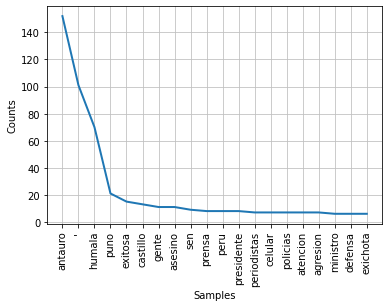

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [17]:
import numpy as np

documents = np.array2string(clean_df.text.values)

# Remove stopwords
content = [
    [
        token.text
        for token in sentence
        if token.pos_ in {"NOUN", "VERB", "PROPN", "ADJ", "ADV"}
        and not token.is_stop
    ]
    for sentence in nlp(documents).sents
]

# Get tokens
tokens = []
for i in content:
    tokens += i
while "_" in tokens:
    tokens.remove("_")  # Removes strange character

# Create text object
text = nltk.Text(tokens)

# Plot most frequent words
text.plot(20)

### Buscar en el texto

Hay muchas formas de examinar el contexto de un texto además de simplemente leerlo. Una vista de concordancia nos muestra cada aparición de una palabra dada, junto con algún contexto:

In [18]:
text.concordance("puno")

Displaying 21 of 21 matches:
e antauro humala agredio periodistas puno ' atvmas acompan arrebato celular ho
ro humala agredio periodista exitosa puno l alertan antauro humala influenciar
iaga antauro humala llego entrevista puno intolerancia rebaso vas llamar atenc
ntauro humala perdio papeles exitosa puno plena transmision locutor david mama
nformamosyopinamos conductor exitosa puno david mamani refirio agresion sufrio
uro humala ataca periodistas exitosa puno ' alerta antauro humala perdio papel
es set mesa conduccion radio exitosa puno l antauro humala ataca prensa roba c
ro humala pierde papeles periodistas puno agarraba golpes ' dices cosas atacar
o personas lgbt apoyan tipo realidad puno bocon antauro deschavado pedir apoyo
es antauro humala agredio periodista puno man ana llego nefasto ' plancha pres
presidente video periodistas exitosa puno sufren agresion hurto celular seguri
r hermano responde conductor exitosa puno agresion equipo antauro humala pense
nsa ' david mamani cond

También puedes generar texto aleatoriamente a partir de un modelo de texto:

In [19]:
text.generate()

llego ' ' aliados antauro exichota pobre gente locos seguir demente
asesino antauro ' invitan drogos asesinos gente desadaptada tiro salio
culata antauro ' vivo antauro humala agredio periodistas puno agarraba
golpes ' dices amor platonico antauro ' pusieron denuncia antauro
humala audacia ' exichota ganado pulso consecuencias maltrato gente '
vivo antauro humala pense lectura contexto politico actual jose luis
renique libro nacion radical luces ' ' david mamani alert ' jose cueto
daniel barragan pedro castillo apoya candidatura antauro humala llego
entrevista puno intolerancia rebaso vas llamar atencion cerebro
antauro humala domingos pm ' problema conductores alucinan tremendas


Building ngram index...


"llego ' ' aliados antauro exichota pobre gente locos seguir demente\nasesino antauro ' invitan drogos asesinos gente desadaptada tiro salio\nculata antauro ' vivo antauro humala agredio periodistas puno agarraba\ngolpes ' dices amor platonico antauro ' pusieron denuncia antauro\nhumala audacia ' exichota ganado pulso consecuencias maltrato gente '\nvivo antauro humala pense lectura contexto politico actual jose luis\nrenique libro nacion radical luces ' ' david mamani alert ' jose cueto\ndaniel barragan pedro castillo apoya candidatura antauro humala llego\nentrevista puno intolerancia rebaso vas llamar atencion cerebro\nantauro humala domingos pm ' problema conductores alucinan tremendas"

### Nube de palabras

Una manera más amable de observar las palabras más frecuentes es a través de una nube de palabras:

In [ ]:
!wget "https://github.com/renatoparedes/IntroPythonInvestigacionPsicologia/raw/master/AnalisisdeDatosCualitativos/cloud.png"

--2022-08-21 21:58:00--  https://github.com/renatoparedes/IntroPythonInvestigacionPsicologia/raw/master/AnalisisdeDatosCualitativos/cloud.png
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/renatoparedes/IntroPythonInvestigacionPsicologia/master/AnalisisdeDatosCualitativos/cloud.png [following]
--2022-08-21 21:58:00--  https://raw.githubusercontent.com/renatoparedes/IntroPythonInvestigacionPsicologia/master/AnalisisdeDatosCualitativos/cloud.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8003::154, 2606:50c0:8000::154, 2606:50c0:8002::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8003::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70600 (69K) [image/png]
Saving

In [20]:
# Function to Create Wordcloud
import nltk
import numpy as np
from PIL import Image
from wordcloud import WordCloud
from nltk.corpus import stopwords

nltk.download("stopwords")


def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    mystopwords = set(stopwords.words("spanish", "english"))
    mystopwords.update(
        ["antauro", "humala"]
    )  # Para añadir palabras a ignorar en la nube de palabras
    wc = WordCloud(
        background_color="white",
        mask=mask,
        max_words=3000,
        stopwords=mystopwords,
        collocations=False,
    )
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path = "wc.png"
    display(Image.open(path))

[nltk_data] Downloading package stopwords to /home/renato/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Si tienes tiempo, te invito a revisar formas avanzadas (premium) de realizar búsquedas en twitter en el siguiente [enlace](https://towardsdatascience.com/how-to-use-twitter-premium-search-apis-for-mining-tweets-2705bbaddca). 

Ahora estamos listos para crear nuestra nube:

Word Cloud Saved Successfully


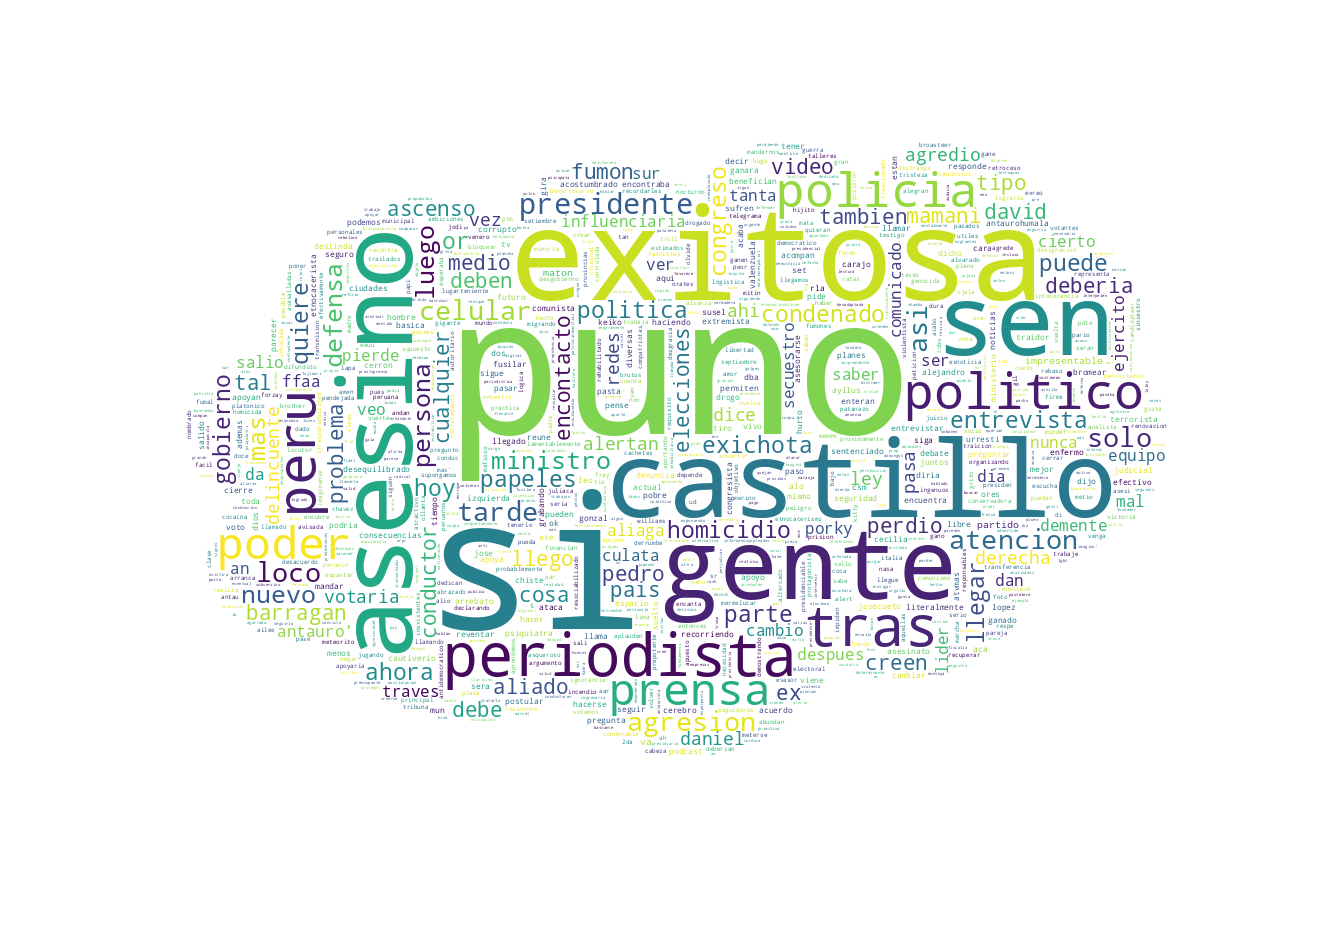

In [21]:
# Creating wordcloud for all tweets
create_wordcloud(clean_df["text"].values)

Si tienes tiempo, te invito a revisar el contenido de los libros [Text Analysis in Python for Social Scientists – Discovery and Exploration](https://www.cambridge.org/core/elements/abs/text-analysis-in-python-for-social-scientists/BFAB0A3604C7E29F6198EA2F7941DFF3) y [Twitter as Data](https://www.cambridge.org/core/elements/abs/twitter-as-data/27B3DE20C22E12E162BFB173C5EB2592).

Además, te invito a revisar la técnica [Sentiment Analysis](https://realpython.com/python-nltk-sentiment-analysis/#using-nltks-pre-trained-sentiment-analyzer).